In [1]:
# Importing all Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving collegePlace_case study.csv to collegePlace_case study.csv


In [3]:
df = pd.read_csv('collegePlace_case study.csv')
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [4]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 0 to 2960
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                1137 non-null   int64 
 1   Gender             1137 non-null   object
 2   Stream             1137 non-null   object
 3   Internships        1137 non-null   int64 
 4   CGPA               1137 non-null   int64 
 5   Hostel             1137 non-null   int64 
 6   HistoryOfBacklogs  1137 non-null   int64 
 7   PlacedOrNot        1137 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 79.9+ KB


In [5]:
df[['Gender']] = df[['Gender']].astype('category')
df[['Stream']] = df[['Stream']].astype('category')
df['Gender'] = df['Gender'].cat.codes
df['Stream'] = df['Stream'].cat.codes

In [6]:
df = pd.get_dummies(data=df,columns=['Gender','Stream'],drop_first=True)
df.tail()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender_1,Stream_1,Stream_2,Stream_3,Stream_4,Stream_5
2946,23,1,7,1,1,0,1,0,0,0,1,0
2952,23,0,8,1,0,1,1,0,0,0,0,1
2954,23,1,8,0,1,1,0,1,0,0,0,0
2958,23,0,6,0,1,0,1,1,0,0,0,0
2960,23,1,7,1,0,0,1,0,0,0,0,1


In [ ]:
from statsmodels.stats.weightstats import ztest
z,pval=ztest(sample_1,value=156,alternative='two-sided')
#alpha=0.05
print(z,pval)
# pval<alpha (reject )
#there is significant evidence that mean value is different from 156

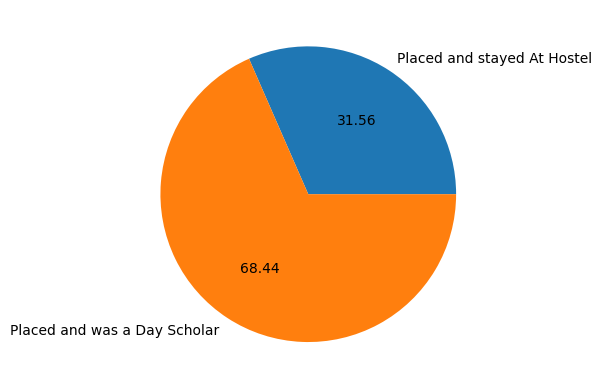

The no. of students who stayed at hostel were: 208 
No. of students who were Day Scholars were: 451


In [ ]:
# Creating 2 models, 1st by dropping hostel and 2nd by considering hostel (Since staying in hostel may or may not affect placements)

a = len(df[(df['PlacedOrNot']==1) & (df['Hostel']==1)])
b = len(df[(df['PlacedOrNot']==1) & (df['Hostel']==0)])
c = len(df[(df['Hostel']==1)])
plt.pie(x = [a,b],labels = ['Placed and stayed At Hostel','Placed and was a Day Scholar'], autopct = '%0.2f')
plt.show()

print(f"The no. of students who stayed at hostel were:", a, "\nNo. of students who were Day Scholars were:",b)

In [ ]:
x=list(df.columns)
print(x)

In [ ]:
def count_plot(x):
    plt.figure(figsize=(15,20))
    plt.subplots_adjust(hspace=0.5,wspace=0.5)

    for i in range(1,len(x)):
        plt.subplot(2,4,i)
        plt.xticks(rotation = 90)
        sns.countplot(df[x[i]])

In [ ]:
count_plot(x)

In [ ]:
sns.boxplot(y=df['Age'])

In [ ]:
df['PlacedOrNot'].value_counts()

In [ ]:
plt.pie(labels=['Placed','Not Placed'], x=df['PlacedOrNot'].value_counts().values,autopct='%0.2f')
plt.title('Placement')
plt.show()

In [ ]:
a=len(df[(df['PlacedOrNot']==1) & (df['HistoryOfBacklogs']==1)])
b=len(df[(df['PlacedOrNot']==1) & (df['HistoryOfBacklogs']==0)])
c=len(df[(df['PlacedOrNot']==1)])

plt.pie(labels=['Placed and backlogs','Placed and no backlogs'],
       x=[a,b],autopct='%0.2f')
plt.title('Placed with and without baclogs')
plt.show()

In [ ]:
c=df['Stream'].value_counts().index
for i in range(len(c)):
    b=df.groupby(by='Stream')
    y=b.get_group(c[i])['PlacedOrNot'].value_counts()
    plt.figure(figsize=(3,3))
    plt.plot(i)
    plt.pie(labels=['Placed','Not placed'],x=y.values,autopct='%.2f')
    plt.title(f'{c[i]}')
    plt.show()

In [ ]:
a=len(df[(df['Internships']==0) & (df['PlacedOrNot']==1)])
b=len(df[(df['Internships']>0) & (df['PlacedOrNot']==1)])
c=len(df[df['PlacedOrNot']==1])

print(f"""The number of students total placed are {c} out of which {b} students are placed
      who have done internship whereas {a} students are placed without doing any internships""")

sns.barplot(y=[a,b],x=['Placed without any internship ', 'Placed with any internship.'])
plt.show()

# Performing Logistic Regression on the data set by dropping Hostel as an independent variable

In [ ]:
X = df.drop(columns=['PlacedOrNot','Hostel'],axis =1)
Y = df.PlacedOrNot

In [ ]:
ss = StandardScaler()

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

log_reg =LogisticRegression(random_state=29)

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
log_reg.fit(X_train,Y_train)

LogisticRegression(random_state=29)

In [ ]:
Y_pred_test_log_reg = log_reg.predict(X_test)
Y_pred_train_log_reg = log_reg.predict(X_train)

In [ ]:
print('Classification report for training data')
print(metrics.classification_report(Y_pred_train_log_reg,Y_train))


print('Classification report for test data')
print(metrics.classification_report(Y_pred_test_log_reg,Y_test))

Classification report for training data
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       357
           1       0.79      0.76      0.78       552

    accuracy                           0.73       909
   macro avg       0.72      0.72      0.72       909
weighted avg       0.74      0.73      0.73       909

Classification report for test data
              precision    recall  f1-score   support

           0       0.59      0.71      0.65        84
           1       0.81      0.71      0.76       144

    accuracy                           0.71       228
   macro avg       0.70      0.71      0.70       228
weighted avg       0.73      0.71      0.71       228



# Performing Logistic Regression on the data set by considering Hostel as an independent variable

In [ ]:
X = df.drop(columns=['PlacedOrNot'],axis =1)
Y = df.PlacedOrNot

ss = StandardScaler()

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

log_reg =LogisticRegression(random_state=29)

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
log_reg.fit(X_train,Y_train)

Y_pred_test_log_reg = log_reg.predict(X_test)
Y_pred_train_log_reg = log_reg.predict(X_train)

print('Classification report for training data')
print(metrics.classification_report(Y_pred_train_log_reg,Y_train))


print('Classification report for test data')
print(metrics.classification_report(Y_pred_test_log_reg,Y_test))

Classification report for training data
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       353
           1       0.80      0.76      0.78       556

    accuracy                           0.73       909
   macro avg       0.72      0.73      0.72       909
weighted avg       0.74      0.73      0.74       909

Classification report for test data
              precision    recall  f1-score   support

           0       0.58      0.73      0.64        81
           1       0.83      0.71      0.76       147

    accuracy                           0.71       228
   macro avg       0.70      0.72      0.70       228
weighted avg       0.74      0.71      0.72       228



# Performing Decision Tree model by dropping Hostel as an independent variable

In [ ]:
X = df.drop(columns=['PlacedOrNot','Hostel'],axis =1)
Y = df.PlacedOrNot

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)


fit_dt = DecisionTreeClassifier(random_state=17)

param_dist = {'max_depth': [2,3,4,5,6,7,8,9,10],
              'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,6,8,10,12,14]}

cv_dt = GridSearchCV(fit_dt, cv = 15, param_grid=param_dist)

cv_dt.fit(X_train, Y_train)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [4, 6, 8, 10, 12, 14]})

In [ ]:
print('Best Parameters using grid search: \n', cv_dt.best_params_)
cv_dt.best_score_

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 14}


0.8274863387978143

In [ ]:
fit_dt.set_params(criterion = 'gini',max_depth =7, max_leaf_nodes=14)

fit_dt.fit(X_train, Y_train)
Y_pred_dec_tree = fit_dt.predict(X_test)

print('Classification report for test data')
print(metrics.classification_report(Y_pred_dec_tree,Y_test))

Classification report for test data
              precision    recall  f1-score   support

           0       0.92      0.73      0.82       128
           1       0.73      0.92      0.81       100

    accuracy                           0.82       228
   macro avg       0.83      0.83      0.82       228
weighted avg       0.84      0.82      0.82       228



# Performing Decision Tree model by taking Hostel as an independent variable

In [ ]:
X = df.drop(columns=['PlacedOrNot'],axis =1)
Y = df.PlacedOrNot

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)


fit_dt = DecisionTreeClassifier(random_state=17)

param_dist = {'max_depth': [2,3,4,5,6,7,8,9,10],
              'criterion': ['gini', 'entropy'],
             'max_leaf_nodes':[4,6,8,10,12,14]}

cv_dt = GridSearchCV(fit_dt, cv = 15, param_grid=param_dist)

cv_dt.fit(X_train, Y_train)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [4, 6, 8, 10, 12, 14]})

In [ ]:
print('Best Parameters using grid search: \n', cv_dt.best_params_)
cv_dt.best_score_

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 14}


0.8263752276867031

In [ ]:
fit_dt.set_params(criterion = 'gini',max_depth =7, max_leaf_nodes=14)

fit_dt.fit(X_train, Y_train)
Y_pred_dec_tree = fit_dt.predict(X_test)

print('Classification report for test data')
print(metrics.classification_report(Y_pred_dec_tree,Y_test))

Classification report for test data
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       122
           1       0.75      0.89      0.81       106

    accuracy                           0.81       228
   macro avg       0.81      0.81      0.81       228
weighted avg       0.82      0.81      0.81       228



In [ ]:
pd.DataFrame(index=X.columns,data=fit_dt.feature_importances_,columns=['Feature impor'])

,Feature impor
Age,0.104499
Internships,0.072432
CGPA,0.771251
Hostel,0.011064
HistoryOfBacklogs,0.028542
Gender_1,0.000000
Stream_1,0.012212
Stream_2,0.000000
Stream_3,0.000000
Stream_4,0.000000


# Performing Random Forest model by dropping Hostel as an independent variable

In [ ]:
X = df.drop(columns=['PlacedOrNot','Hostel'],axis =1)
Y = df.PlacedOrNot

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
fit_rf=RandomForestClassifier(random_state=10)

In [ ]:
param_dist={'max_depth':[2,3,4,6,8,10],
           'max_features':['auto','sqrt','log2'],
           'criterion':['gini','entropy'],
           'n_estimators':[5,10,15,20,25,30]}

cv_rf=GridSearchCV(fit_rf,cv=10,param_grid=param_dist)

cv_rf.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10, 15, 20, 25, 30]})

In [ ]:
cv_rf.best_params_
y_pred_Rand_for=cv_rf.predict(X_test)

print('Classification report for test data')
print(metrics.classification_report(y_pred_Rand_for,Y_test))


Classification report for test data
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       121
           1       0.75      0.88      0.81       107

    accuracy                           0.80       228
   macro avg       0.81      0.81      0.80       228
weighted avg       0.81      0.80      0.80       228



# Performing Random Forest model by considering Hostel as an independent variable

In [ ]:
X = df.drop(columns=['PlacedOrNot'],axis =1)
Y = df.PlacedOrNot

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [ ]:
param_dist={'max_depth':[2,3,4,6,8,10],
           'max_features':['auto','sqrt','log2'],
           'criterion':['gini','entropy'],
           'n_estimators':[5,10,15,20,25,30]}

cv_rf=GridSearchCV(fit_rf,cv=10,param_grid=param_dist)

cv_rf.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10, 15, 20, 25, 30]})

In [ ]:
cv_rf.best_params_
y_pred_Rand_for=cv_rf.predict(X_test)

print('Classification report for test data')
print(metrics.classification_report(y_pred_Rand_for,Y_test))

Classification report for test data
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       116
           1       0.76      0.86      0.81       112

    accuracy                           0.80       228
   macro avg       0.80      0.80      0.80       228
weighted avg       0.80      0.80      0.80       228



# Performing K Means model by dropping Hostel as an independent variable

(Text(0.5, 0, 'K'), Text(0, 0.5, 'Accuracy'))

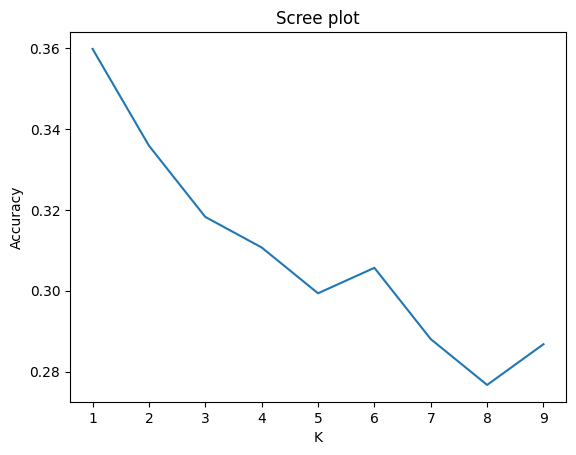

In [ ]:
from sklearn.model_selection import cross_val_score
X = df.drop(columns=['PlacedOrNot','Hostel'],axis =1)
Y = df.PlacedOrNot

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=27)

ss=StandardScaler()

X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

error = []

for i in range (1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  score = cross_val_score(knn, X_train, Y_train, cv=5)
  error.append(1-score.mean())

plt.plot(range(1,10),error)
plt.title('Scree plot')
plt.xlabel('K'), plt.ylabel('Accuracy')

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

Y_pred_knn = knn.predict(X_test)

print('Classification report for test data')
print(metrics.classification_report(Y_pred_knn,Y_test))

Classification report for test data
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       142
           1       0.75      0.77      0.76       200

    accuracy                           0.72       342
   macro avg       0.71      0.71      0.71       342
weighted avg       0.72      0.72      0.72       342



# Performing K Means model by considering Hostel as an independent variable

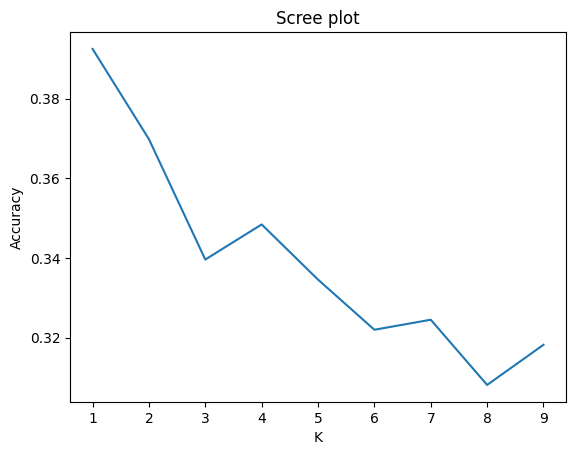

In [ ]:
X = df.drop(columns=['PlacedOrNot'],axis =1)
Y = df.PlacedOrNot

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=27)

ss=StandardScaler()

X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

error = []

for i in range (1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  score = cross_val_score(knn, X_train, Y_train, cv=5)
  error.append(1-score.mean())

plt.plot(range(1,10),error)
plt.title('Scree plot')
plt.xlabel('K'), plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)

Y_pred_knn = knn.predict(X_test)

print('Classification report for test data')
print(metrics.classification_report(Y_pred_knn,Y_test))

Classification report for test data
              precision    recall  f1-score   support

           0       0.78      0.63      0.70       173
           1       0.68      0.82      0.75       169

    accuracy                           0.73       342
   macro avg       0.73      0.73      0.72       342
weighted avg       0.74      0.73      0.72       342

